In [3]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [6]:
#check if we need a scaler 
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [7]:
#values in max has wide ranges so a scaler might be needed

In [8]:
#Check for multicollinearity
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


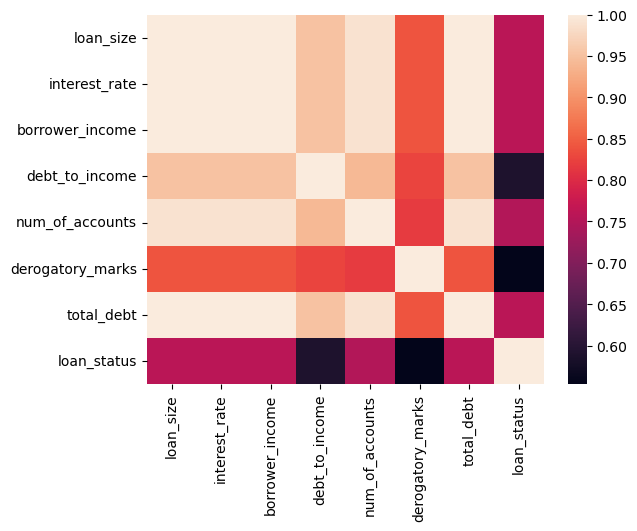

In [9]:
sns.heatmap(corrs)
plt.show()

In [10]:
#There is multicollinearity- variables in a regression model are highly correlated with each other

In [11]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns=['loan_status'])

In [12]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [13]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [14]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)

(54275, 7)
(23261, 7)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [15]:
# We built this in class with my amazing Prof 
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg = LogisticRegression(random_state=1)

# Fit the model using training data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [17]:
# Make a prediction using the testing data
traning_pred = logreg.predict(X_train)
traning_prob = logreg.predict_proba(X_train)

test_pred = logreg.predict(X_test)
test_prob = logreg.predict_proba(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

TRAINING METRICS

Train Confusion Matrix: 
[[52258   263]
 [  167  1587]]

Train Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     52521
           1       0.86      0.90      0.88      1754

    accuracy                           0.99     54275
   macro avg       0.93      0.95      0.94     54275
weighted avg       0.99      0.99      0.99     54275





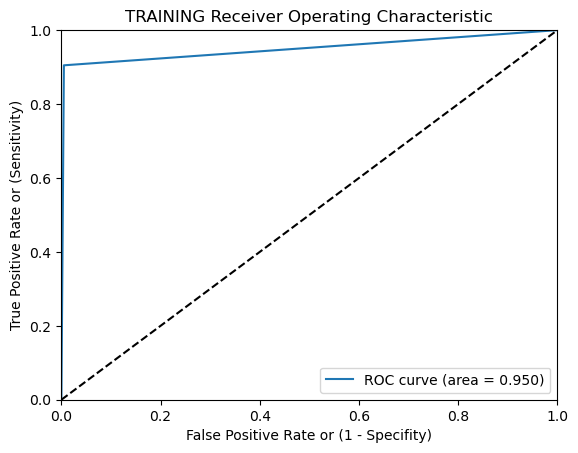



TESTING METRICS

Test Confusion Matrix: 
[[22399   116]
 [   70   676]]

Test Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.91      0.88       746

    accuracy                           0.99     23261
   macro avg       0.93      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261





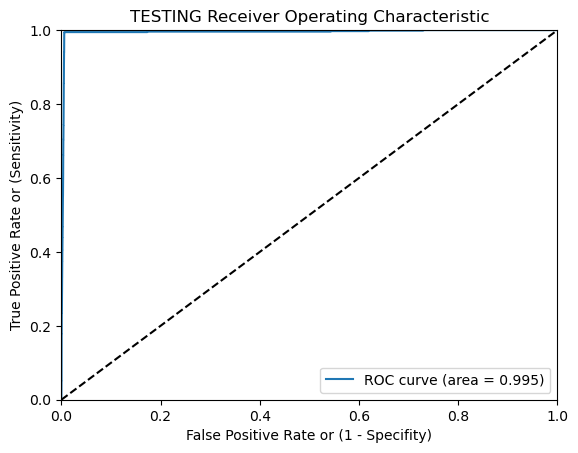

In [18]:
# Generate a confusion matrix for the model
# Print the classification report for the model

# evaluate train
train_cr = classification_report(y_train, traning_pred)
train_cm = confusion_matrix(y_train, traning_pred)

train_report = f"""
Train Confusion Matrix: 
{train_cm}

Train Report: 
{train_cr}
"""
print("TRAINING METRICS")
print(train_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_train, traning_pred)
roc_auc = roc_auc_score(y_train, traning_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TRAINING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print()
print()

# evaluate test
test_cr = classification_report(y_test, test_pred)
test_cm = confusion_matrix(y_test, test_pred)

test_report = f"""
Test Confusion Matrix: 
{test_cm}

Test Report: 
{test_cr}
"""
print("TESTING METRICS")
print(test_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, test_prob[:,1])
roc_auc = roc_auc_score(y_test, test_prob[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TESTING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** There is an overall accuracy of 0.99. precision is at 0.86 and recall is at 0.90. Signs of overfitting. Could be better by using PCA/Scaler.

---

In [19]:
#SVC

TRAINING METRICS

    Train Confusion Matrix: 
    [[52235   286]
 [   14  1740]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     52521
           1       0.86      0.99      0.92      1754

    accuracy                           0.99     54275
   macro avg       0.93      0.99      0.96     54275
weighted avg       1.00      0.99      0.99     54275

    



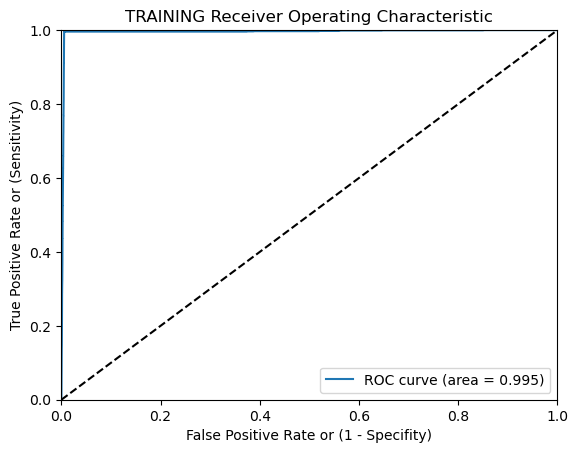



TESTING METRICS

    Test Confusion Matrix: 
    [[22385   130]
 [    6   740]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.99      0.92       746

    accuracy                           0.99     23261
   macro avg       0.93      0.99      0.96     23261
weighted avg       0.99      0.99      0.99     23261

    



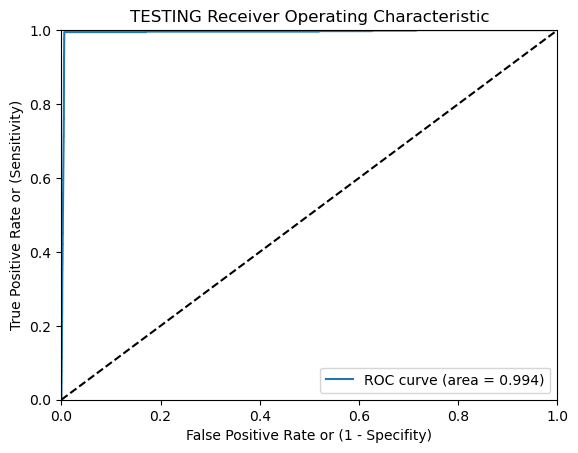

In [20]:
# initialize
sv = SVC(probability=True)

# fit
sv.fit(X_train, y_train)

doClassification(sv, X_train, X_test, y_train, y_test)

In [21]:
#Significant reduction of false negative 
#Increase of false positive

In [22]:
#KNN

TRAINING METRICS

    Train Confusion Matrix: 
    [[52235   286]
 [   11  1743]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     52521
           1       0.86      0.99      0.92      1754

    accuracy                           0.99     54275
   macro avg       0.93      0.99      0.96     54275
weighted avg       1.00      0.99      0.99     54275

    



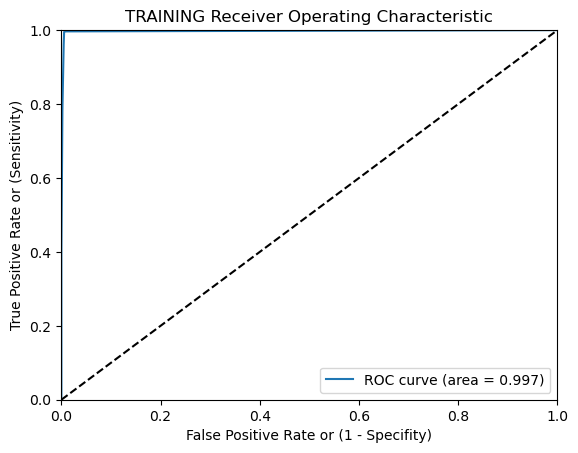



TESTING METRICS

    Test Confusion Matrix: 
    [[22382   133]
 [    5   741]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.99      0.91       746

    accuracy                           0.99     23261
   macro avg       0.92      0.99      0.96     23261
weighted avg       0.99      0.99      0.99     23261

    



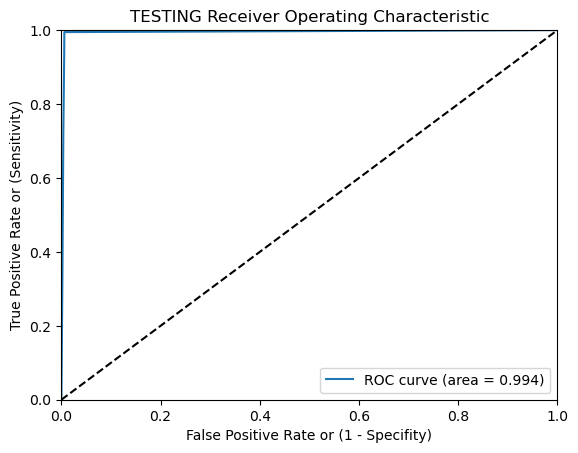

In [23]:
# initialize
knn = KNeighborsClassifier(n_neighbors=7)

# fit
knn.fit(X_train, y_train)

doClassification(knn, X_train, X_test, y_train, y_test)

In [24]:
#No signs of overfitting
#KNN performs better than SVC

In [25]:
#Decision Tree

TRAINING METRICS

    Train Confusion Matrix: 
    [[52463    58]
 [   70  1684]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     52521
           1       0.97      0.96      0.96      1754

    accuracy                           1.00     54275
   macro avg       0.98      0.98      0.98     54275
weighted avg       1.00      1.00      1.00     54275

    



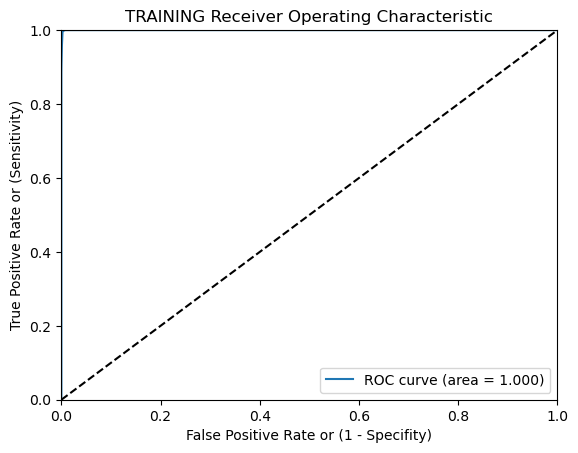



TESTING METRICS

    Test Confusion Matrix: 
    [[22402   113]
 [  110   636]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.85      0.85       746

    accuracy                           0.99     23261
   macro avg       0.92      0.92      0.92     23261
weighted avg       0.99      0.99      0.99     23261

    



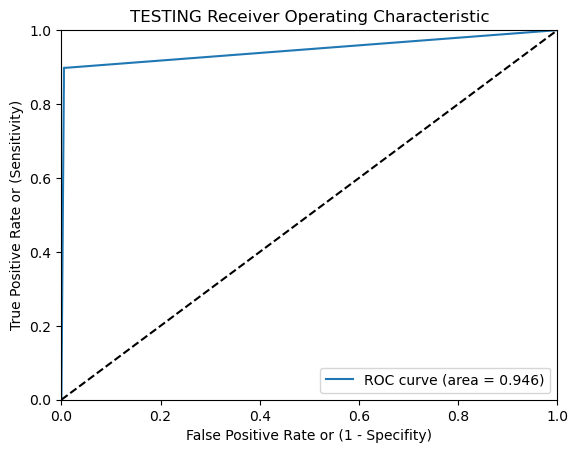

In [26]:
# initialize
dt = DecisionTreeClassifier(random_state=42)

# fit
dt.fit(X_train, y_train)

doClassification(dt, X_train, X_test, y_train, y_test)

In [27]:
#terrible 
#KNN still better

In [28]:
#RandonForest

TRAINING METRICS

    Train Confusion Matrix: 
    [[52414   107]
 [   21  1733]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     52521
           1       0.94      0.99      0.96      1754

    accuracy                           1.00     54275
   macro avg       0.97      0.99      0.98     54275
weighted avg       1.00      1.00      1.00     54275

    



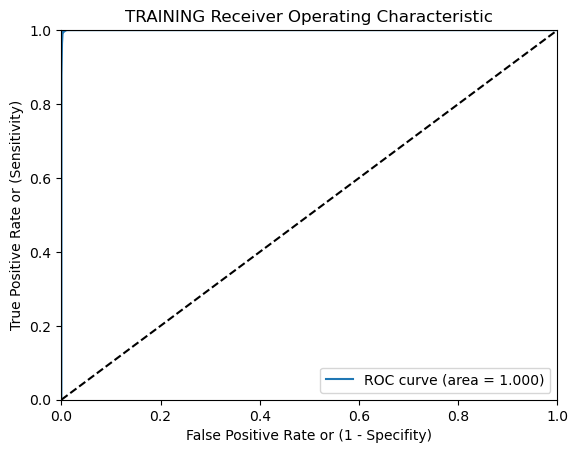



TESTING METRICS

    Test Confusion Matrix: 
    [[22400   115]
 [   78   668]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.90      0.87       746

    accuracy                           0.99     23261
   macro avg       0.92      0.95      0.93     23261
weighted avg       0.99      0.99      0.99     23261

    



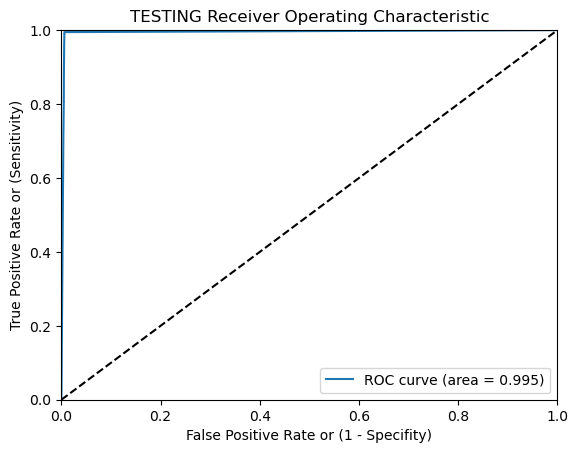

In [29]:
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train, y_train)

doClassification(rf, X_train, X_test, y_train, y_test)

In [30]:
#KNN is still better.(KNN recall is better than rf )

In [31]:
#AdaBoost

TRAINING METRICS

    Train Confusion Matrix: 
    [[52233   288]
 [    9  1745]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     52521
           1       0.86      0.99      0.92      1754

    accuracy                           0.99     54275
   macro avg       0.93      0.99      0.96     54275
weighted avg       1.00      0.99      0.99     54275

    



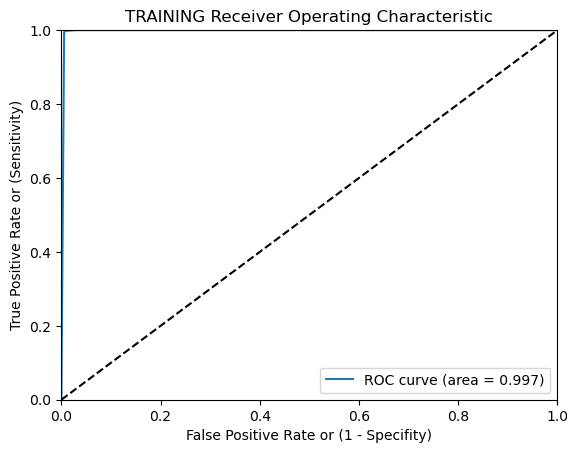



TESTING METRICS

    Test Confusion Matrix: 
    [[22382   133]
 [    4   742]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.99      0.92       746

    accuracy                           0.99     23261
   macro avg       0.92      0.99      0.96     23261
weighted avg       0.99      0.99      0.99     23261

    



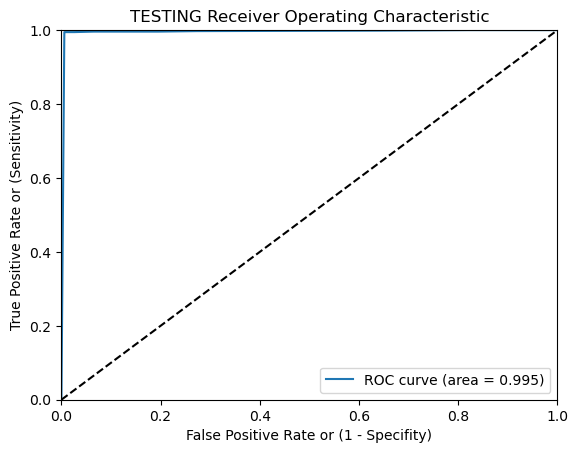

In [32]:
# initialize
ada = AdaBoostClassifier(random_state=42)

# fit
ada.fit(X_train, y_train)

doClassification(ada, X_train, X_test, y_train, y_test)

In [33]:
# No signs of overfitting
# looks better than KNN 

In [34]:
#Gradient Boosting

TRAINING METRICS

    Train Confusion Matrix: 
    [[52242   279]
 [    8  1746]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     52521
           1       0.86      1.00      0.92      1754

    accuracy                           0.99     54275
   macro avg       0.93      1.00      0.96     54275
weighted avg       1.00      0.99      0.99     54275

    



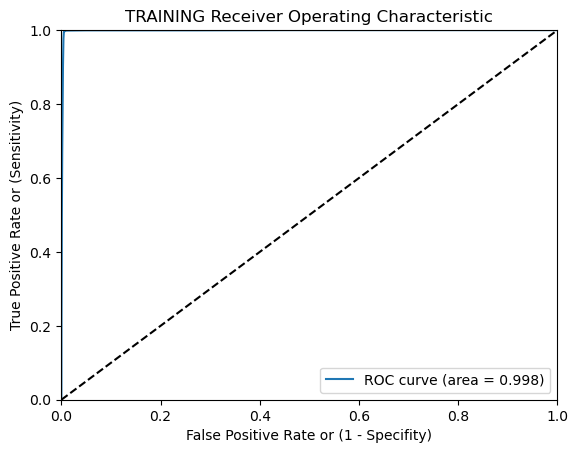



TESTING METRICS

    Test Confusion Matrix: 
    [[22384   131]
 [    5   741]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.99      0.92       746

    accuracy                           0.99     23261
   macro avg       0.92      0.99      0.96     23261
weighted avg       0.99      0.99      0.99     23261

    



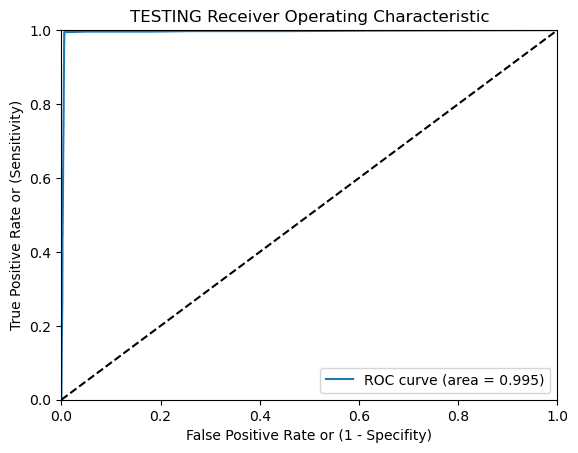

In [35]:
 # initialize
gb = GradientBoostingClassifier(random_state=42)

# fit
gb.fit(X_train, y_train)

doClassification(gb, X_train, X_test, y_train, y_test)

In [36]:
#performce as good as KNN and AdaBoost
#no sign of overfitting

In [37]:
#In conclusion 
    #KNN,AdaBoost, and GradientBoost are the best models to use.
    #KNN provide more explainability 
    #AdaBoost and GradientBoost are more adaptable 

In [45]:
#What feature is impotant 
fi = pd.DataFrame(zip(X.columns, gb.feature_importances_), columns=["feature", "importance"])
fi.sort_values(by="importance", ascending=True)

,feature,importance
5,derogatory_marks,0.000000
3,debt_to_income,0.011944
6,total_debt,0.019022
2,borrower_income,0.054441
1,interest_rate,0.173708
0,loan_size,0.219488
4,num_of_accounts,0.521396


In [47]:
fi = pd.DataFrame(zip(X.columns, gb.feature_importances_), columns=["feature", "importance"])
fi = fi.sort_values(by="importance", ascending=True)
fi

,feature,importance
5,derogatory_marks,0.000000
3,debt_to_income,0.011944
6,total_debt,0.019022
2,borrower_income,0.054441
1,interest_rate,0.173708
0,loan_size,0.219488
4,num_of_accounts,0.521396
